<img src="signature-informal.png" alt="MDST Logo" style="width: 500px;">
# Linear Models
In this class, we are going to talk about two machine learning methods that involve linear functions: linear regression and logistic regression. 

## Linear Regression

Linear regression assumes that for an independent numeric variable $X$ and a dependent numeric variable $Y$, their relationship can be expressed as follows,
\begin{equation*}
Y=\beta_{0}+\beta_{1}X
\end{equation*}
in which $\beta_{0}$ and $\beta_{1}$ are parameters we need to infer from the dataset.

<img src="linear-regression.png" alt="Linear Regression" style="width: 200px;">

$\beta_{0}$ and $\beta_{1}$ are usually decided based on the metric of _Residual Sum of Squares_(as small as possible).
\begin{equation*}
\text{RSS} = (y_{1}-\beta_{1}x_{1}-\beta_{0})^{2}+(y_{2}-\beta_{1}x_{2}-\beta_{0})^{2}+\cdots+(y_{n}-\beta_{1}x_{n}-\beta_{0})^{2}
\end{equation*}

The measurement of a linear model is $R^{2}$(R-squared), and it is decided by the proportion between _Residual Sum of Squares_(RSS) and _Total Sum of Squares_(TSS). 
\begin{equation*}
\text{TSS} = (y_{1}-\bar{y})^{2}+(y_{2}-\bar{y})^{2}+\cdots+(y_{n}-\bar{y})^{2}
\end{equation*}
\begin{equation*}
R^{2} = 1 - \frac{\text{RSS}}{\text{TSS}}
\end{equation*}

Now let's use an example to illustrate linear regression. The data we are using comes from [Gapminder foundation](https://www.gapminder.org/).

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

First load the data and have a glimpse of its variables.

In [73]:
df = pd.read_csv('gapminder.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [75]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [76]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In this tutorial session we will only illustrate linear regression of life expectancy(`life`) over fertility(`fertility`). Linear regression can accept more than one independent variable.  

In [77]:
y = df['life']
X = df['fertility']
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

Split into a training set and a test set.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

Learn the model on the training set and make prediction on the test set. Evaluate the performance of the model by looking at the R-squared.

In [29]:
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_pred = reg_all.predict(X_test)

In [31]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.7298987360907498


Let's visualize our performance of linear regression.

In [32]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

In [33]:
y_pred = reg.predict(prediction_space)

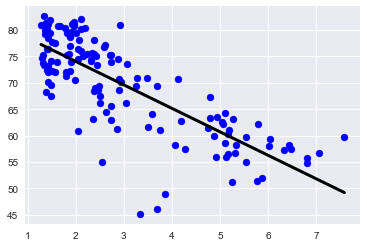

In [34]:
sns.set()
plt.scatter(X,y,color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

## Cross Validation
Here I am going to introduce a very important approach that can measure overall performance of a model on a dataset. In the above example, we have got an R-squared of 0.72 for a specific train-test split. This outcome may not be able to represent how linear regression performs on this dataset based on other different splits. That's why cross validation is introduced. It features multiple train-test splits and multiple fittings of the same model and have multiple outcomes. By looking at more outcomes, we are able to have a better idea about how good this model actually performs.

<img src="cross-validation.png" alt="Cross Validation" style="width: 500px;"/>

Do 10-fold cross validation on our dataset.

In [35]:
from sklearn.model_selection import cross_val_score

In [38]:
reg = LinearRegression()

In [41]:
cv_scores = cross_val_score(reg,X,y,cv=10)

In [42]:
print(cv_scores)

[0.54471791 0.75586083 0.83921958 0.6900756  0.33991801 0.53042913
 0.44784016 0.66619475 0.4439451  0.62573667]


In [43]:
np.mean(cv_scores)

0.5883937741571185

## Logistic Regression
Logistic regression, though has a name "regression" in it, is not used for regression(continuous variables). It is used for predicting **binary outcomes**(categorical variables).

Then why is there a word "regression" in it? It is because of its intrinsic way of predicting labels. It has three steps towards making the final prediction:
1. Calculate a intermediate value $z$ based on the independent variables,
 \begin{equation*}
 z = \beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\cdots+\beta_{n}x_{n}
 \end{equation*}
2. Calculate a value that ranges between 0 and 1
 \begin{equation*}
 w = \frac{e^{z}}{e^{z}+1}
 \end{equation*}
 The function above represents a _sigmoid_ curve.
 <img src="logistic-regression.png" alt="Logistic Regression" style="width: 400px;"/>
3. Set up a threshold(usually 0.5). If $w$ is larger than 0.5, then assign $y$ label 1, otherwise assign $y$ label 0.

The example that we are presenting comes from [UCI Machine Learning Repo](http://archive.ics.uci.edu/ml/datasets/diabetes). The goal is to predict whether a person will have diabetes in the future.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
df = pd.read_csv('diabetes.csv')

In [79]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Notice that the response variable is encoded as an integer value. We need to transform that into a binary variable first.

In [48]:
df['diabetes'] = df['diabetes'].astype('bool')

The following code is how we run the model and inspect its performance.

In [52]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [55]:
logreg = LogisticRegression()

In [56]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
y_pred = logreg.predict(X_test)

In [58]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

      False       0.83      0.84      0.84       206
       True       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



The outcome above looks very confusing. Let's use a 2-by-2 _contingency table_ to illustrate. In the table below, _TP_ stands for **True Positive**, _FP_ stands for **False Positive**, _TN_ stands for **True Negative** and _FN_ stands for **False Negative**.
<img src="contingency-table.png" alt="Contingency Table" style="width: 300px;"/>
\begin{equation*}
\text{precision} = \frac{TP}{TP+FP} \quad \text{Recall} =\frac{TP}{TP+FN}
\end{equation*}

## ROC Curve

Besides metrics above to measure the performance of logistic regression, we also have another more vivid method to visualize the accuracy. It is called area under the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

In [59]:
from sklearn.metrics import roc_curve

In [60]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

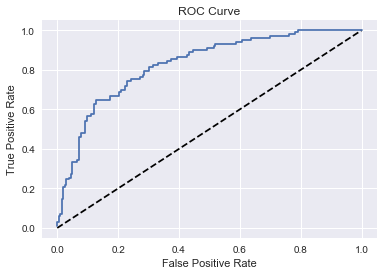

In [62]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()